# Install Necessary Libraries

In [1]:
import pandas as pd

# convert the dat files to the csv


files downloaded from the https://grouplens.org/datasets/movielens/10m/

# load the csv

In [2]:
movies = pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/movies.csv")
ratings= pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/ratings.csv")
tags=pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/tags.csv")

# print the first few lines of the csv

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


 Give the columns name

In [6]:
movies = pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/movies.csv")
ratings= pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/ratings.csv")
tags=pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-latest-small/tags.csv")
# Rename the columns to more descriptive names
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
tags.columns = ['UserID', 'MovieID', 'Tag', 'Timestamp']
movies.columns = ['MovieID', 'Title', 'Genres']

# Display the first few rows of each DataFrame to verify the new column names
print("Ratings DataFrame head:")
print(ratings.head())
print("/nTags DataFrame head:")
print(tags.head())
print("/nMovies DataFrame head:")
print(movies.head())

Ratings DataFrame head:
   UserID  MovieID  Rating  Timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
/nTags DataFrame head:
   UserID  MovieID              Tag   Timestamp
0       2    60756            funny  1445714994
1       2    60756  Highly quotable  1445714996
2       2    60756     will ferrell  1445714992
3       2    89774     Boxing story  1445715207
4       2    89774              MMA  1445715200
/nMovies DataFrame head:
   MovieID                               Title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        Genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1            

# EDA

## 1 Datashape

1.1. Check DataFrame Shapes
python

In [7]:
# Check the number of rows and columns in each DataFrame
print("Ratings DataFrame shape:", ratings.shape)
print("Tags DataFrame shape:", tags.shape)
print("Movies DataFrame shape:", movies.shape)

Ratings DataFrame shape: (100836, 4)
Tags DataFrame shape: (3683, 4)
Movies DataFrame shape: (9742, 3)


1.2. Display Data Types

In [8]:
# Display data types of each DataFrame
print("Ratings DataFrame data types:")
print(ratings.dtypes)

print("\nTags DataFrame data types:")
print(tags.dtypes)

print("\nMovies DataFrame data types:")
print(movies.dtypes)

Ratings DataFrame data types:
UserID         int64
MovieID        int64
Rating       float64
Timestamp      int64
dtype: object

Tags DataFrame data types:
UserID        int64
MovieID       int64
Tag          object
Timestamp     int64
dtype: object

Movies DataFrame data types:
MovieID     int64
Title      object
Genres     object
dtype: object


## 2. Handling Missing Values


2.1. Check for Missing Values

In [9]:
# Check for missing values in ratings DataFrame
print("Missing values in ratings:")
print(ratings.isnull().sum())

# Check for missing values in tags DataFrame
print("\nMissing values in tags:")
print(tags.isnull().sum())

# Check for missing values in movies DataFrame
print("\nMissing values in movies:")
print(movies.isnull().sum())


Missing values in ratings:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in tags:
UserID       0
MovieID      0
Tag          0
Timestamp    0
dtype: int64

Missing values in movies:
MovieID    0
Title      0
Genres     0
dtype: int64


2.2. Handle Missing Values


In [10]:
# For example, drop rows with missing values
ratings.dropna(inplace=True)
tags.dropna(inplace=True)
movies.dropna(inplace=True)


## 3. Checking for Duplicates



In [11]:
# Check for duplicates in ratings DataFrame
print("Duplicates in ratings:", ratings.duplicated().sum())

# Check for duplicates in tags DataFrame
print("Duplicates in tags:", tags.duplicated().sum())

# Check for duplicates in movies DataFrame
print("Duplicates in movies:", movies.duplicated().sum())


Duplicates in ratings: 0
Duplicates in tags: 0
Duplicates in movies: 0


3.1. Remove Duplicates

In [12]:
# Remove duplicate rows if any
ratings.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)


## 4. Descriptive Statistics


4.1. Summary Statistics of Ratings



In [13]:
# Summary statistics for ratings
print("Ratings summary statistics:")
print(ratings['Rating'].describe())


Ratings summary statistics:
count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64


4.2. Number of Unique Users and Movies


In [14]:
# Number of unique users and movies
print("Number of unique users:", ratings['UserID'].nunique())
print("Number of unique movies:", ratings['MovieID'].nunique())


Number of unique users: 610
Number of unique movies: 9724


In [15]:
print("Unique User IDs:", ratings['UserID'].unique())


Unique User IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 2

In [16]:
# Unique users and movies
print("Number of unique users:", ratings['UserID'].nunique())
print("Number of unique movies:", ratings['MovieID'].nunique())

# Min and Max user IDs
min_user_id = ratings['UserID'].min()
max_user_id = ratings['UserID'].max()
print("Minimum user ID:", min_user_id)
print("Maximum user ID:", max_user_id)

# Assuming all_user_ids is a Series of all possible user IDs from 1 to max_user_id
all_user_ids = pd.Series(range(1, max_user_id + 1))
existing_user_ids = pd.Series(ratings['UserID'].unique())
missing_user_ids = all_user_ids[~all_user_ids.isin(existing_user_ids)]

# Total number of missing user IDs
print("\nTotal number of missing user IDs:", len(missing_user_ids))


Number of unique users: 610
Number of unique movies: 9724
Minimum user ID: 1
Maximum user ID: 610

Total number of missing user IDs: 0


In [17]:
# Assuming 'ratings' DataFrame has a column 'UserID' that contains the user IDs
min_user_id = ratings['UserID'].min()
max_user_id = ratings['UserID'].max()

# Print the minimum and maximum user ID
print("Minimum user ID:", min_user_id)
print("Maximum user ID:", max_user_id)



Minimum user ID: 1
Maximum user ID: 610


5. Ratings Distribution


5.1. Histogram of Ratings


C:\Users\anujp\AppData\Local\Temp\ipykernel_24996\2844918927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratings, palette='viridis')


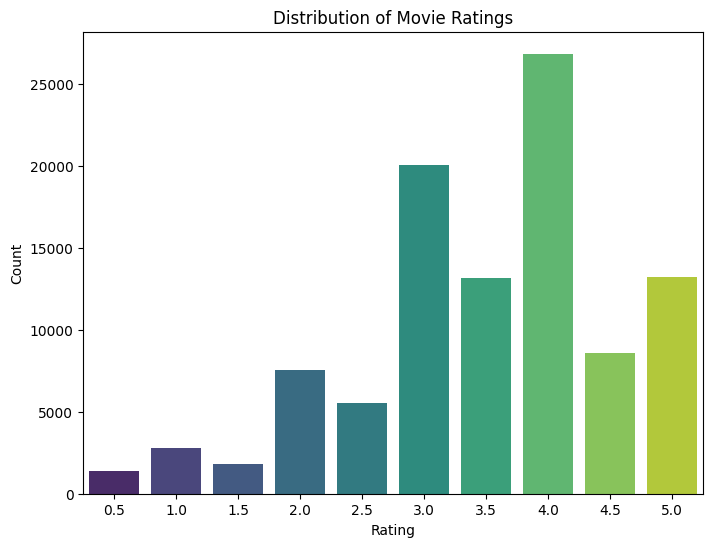

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of ratings
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## 6. User Activity Analysis


6.1. Number of Ratings per User

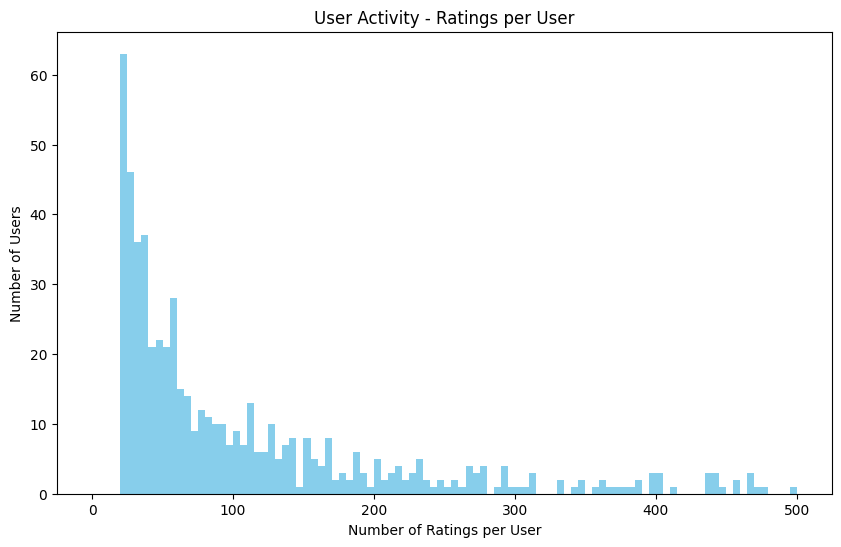

In [19]:
# Calculate number of ratings per user
user_ratings_count = ratings.groupby('UserID')['Rating'].count().reset_index()
user_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(user_ratings_count['RatingsCount'], bins=100, range=(0, 500), color='skyblue')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('User Activity - Ratings per User')
plt.show()


## 7. Movie Popularity Analysis

7.1. Number of Ratings per Movie

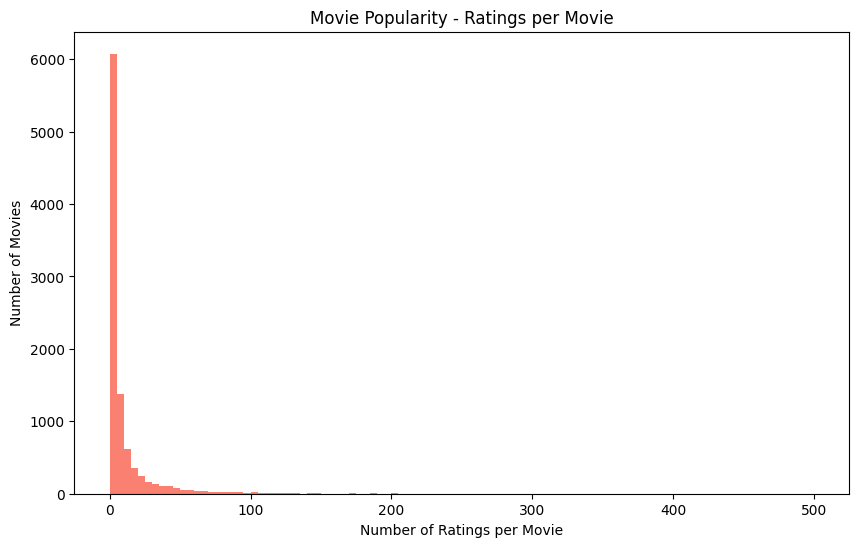

In [20]:
# Calculate number of ratings per movie
movie_ratings_count = ratings.groupby('MovieID')['Rating'].count().reset_index()
movie_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(movie_ratings_count['RatingsCount'], bins=100, range=(0, 500), color='salmon')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movies')
plt.title('Movie Popularity - Ratings per Movie')
plt.show()


## 8. Ratings Over Time

8.1. Convert Timestamp to Datetime

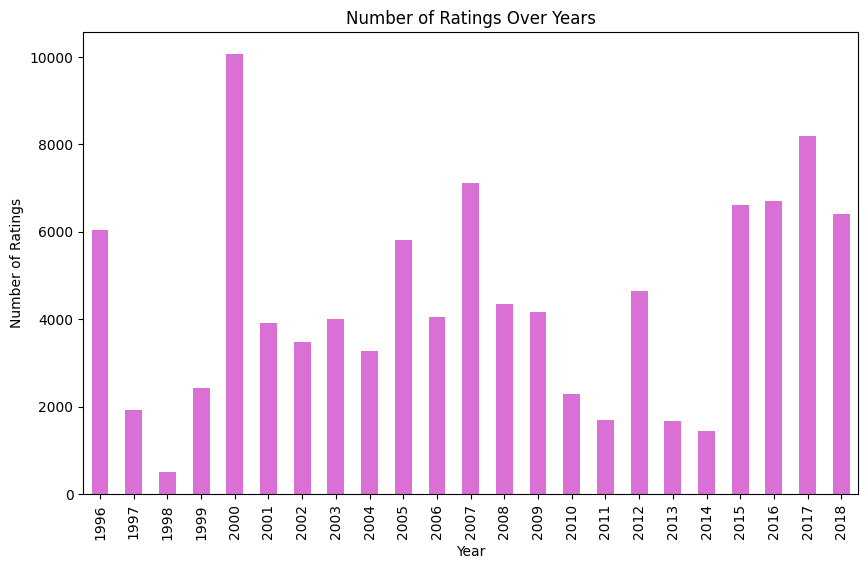

In [21]:
# Convert timestamp to datetime
ratings['Date'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Year'] = ratings['Date'].dt.year

# Plot number of ratings per year
ratings_per_year = ratings.groupby('Year')['Rating'].count()

plt.figure(figsize=(10,6))
ratings_per_year.plot(kind='bar', color='orchid')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Years')
plt.show()


## 9. Genre Analysis

9.1. Most Common Genres

C:\Users\anujp\AppData\Local\Temp\ipykernel_24996\3427931037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


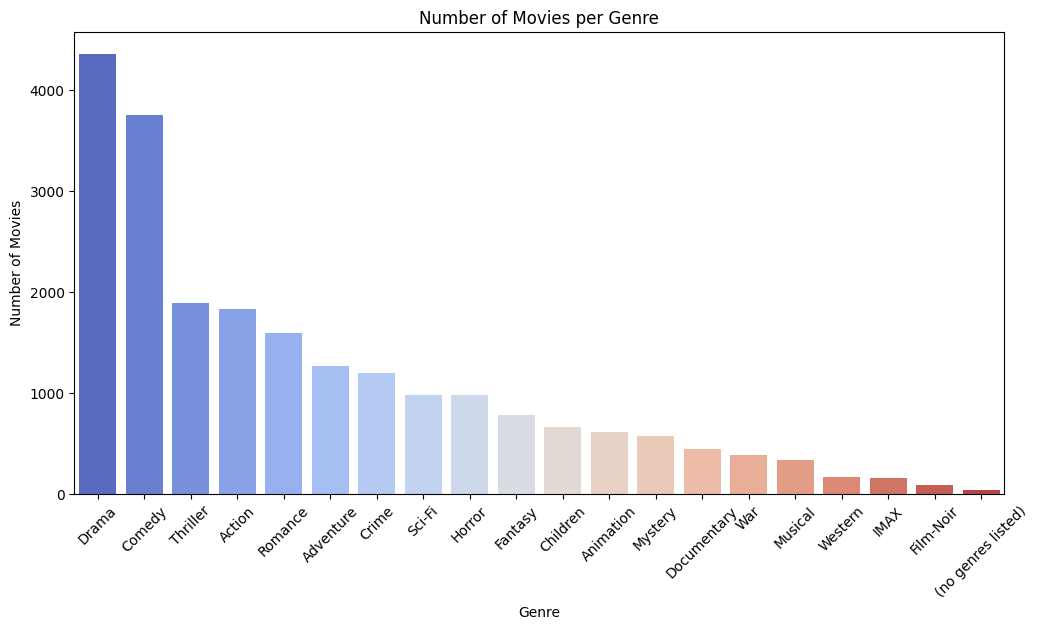

In [22]:
# Split genres and explode the list
movies['GenreList'] = movies['Genres'].str.split('|')
genre_data = movies.explode('GenreList')

# Count the number of movies per genre
genre_counts = genre_data['GenreList'].value_counts()

# Plot the genres
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()


9.2. Average Rating per Genre

C:\Users\anujp\AppData\Local\Temp\ipykernel_24996\3627138159.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')


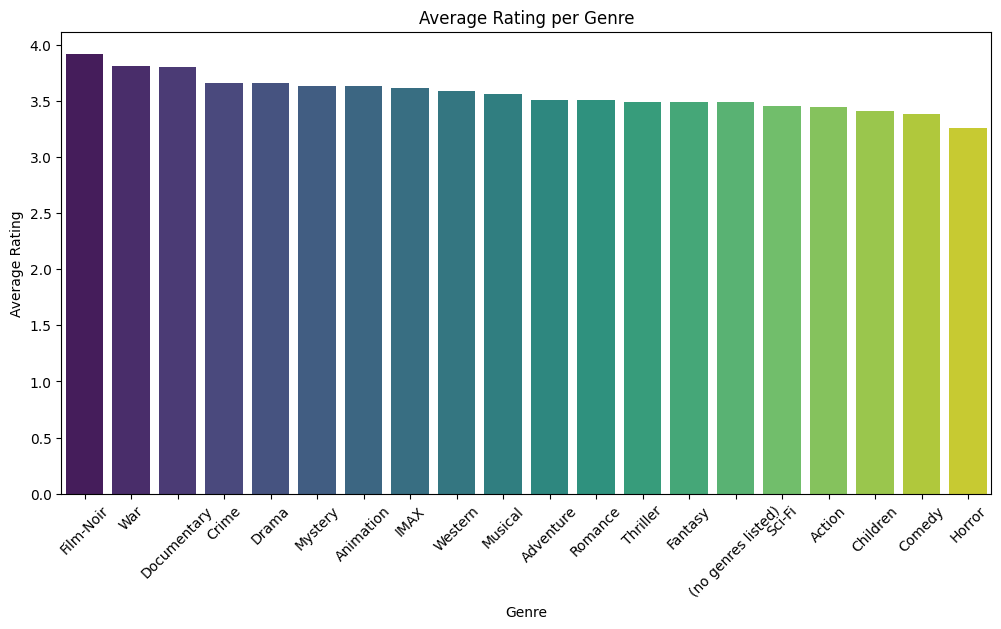

In [23]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Explode genres
ratings_movies['GenreList'] = ratings_movies['Genres'].str.split('|')
ratings_movies = ratings_movies.explode('GenreList')

# Calculate average rating per genre
genre_rating = ratings_movies.groupby('GenreList')['Rating'].mean().sort_values(ascending=False)

# Plot average rating per genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.xticks(rotation=45)
plt.show()


## 10. Tag Analysis

10.1. Most Common Tags

C:\Users\anujp\AppData\Local\Temp\ipykernel_24996\2269342112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='autumn')


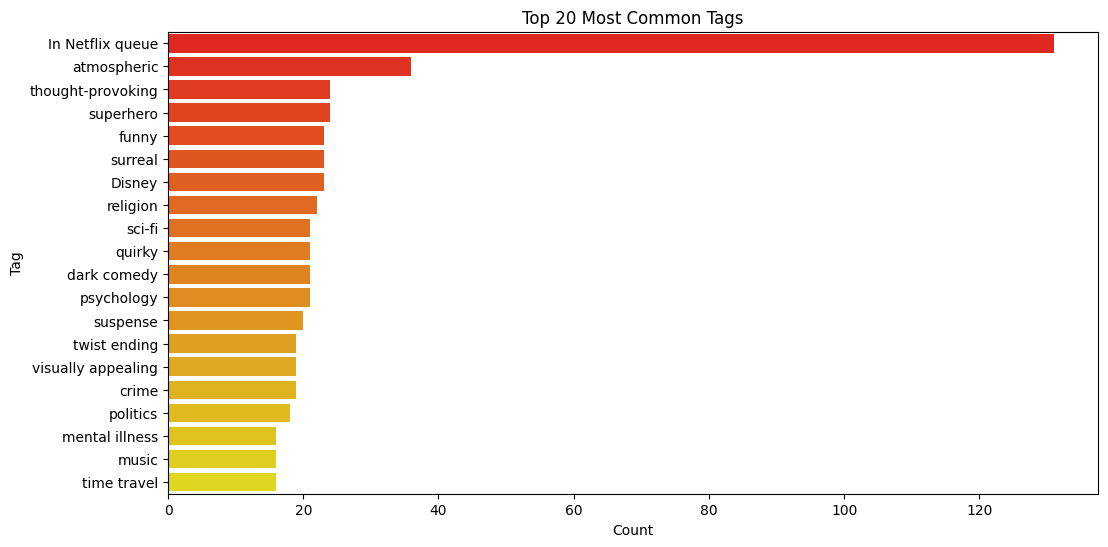

In [24]:
# Count the frequency of each tag
tag_counts = tags['Tag'].value_counts().head(20)

# Plot the top 20 tags
plt.figure(figsize=(12,6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='autumn')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.title('Top 20 Most Common Tags')
plt.show()

## 11. User-Movie Interaction Matrix Sparsity

11.1. Calculate Sparsity

In [25]:
# Total possible interactions
num_users = ratings['UserID'].nunique()
num_movies = ratings['MovieID'].nunique()
total_possible_interactions = num_users * num_movies

# Actual interactions
actual_interactions = len(ratings)

# Sparsity
sparsity = 1 - (actual_interactions / total_possible_interactions)
print(f"Sparsity of the user-item interaction matrix: {sparsity:.4f}")


Sparsity of the user-item interaction matrix: 0.9830


## 12. Correlation Analysis


12.1. Correlation between User's Average Rating and Activity



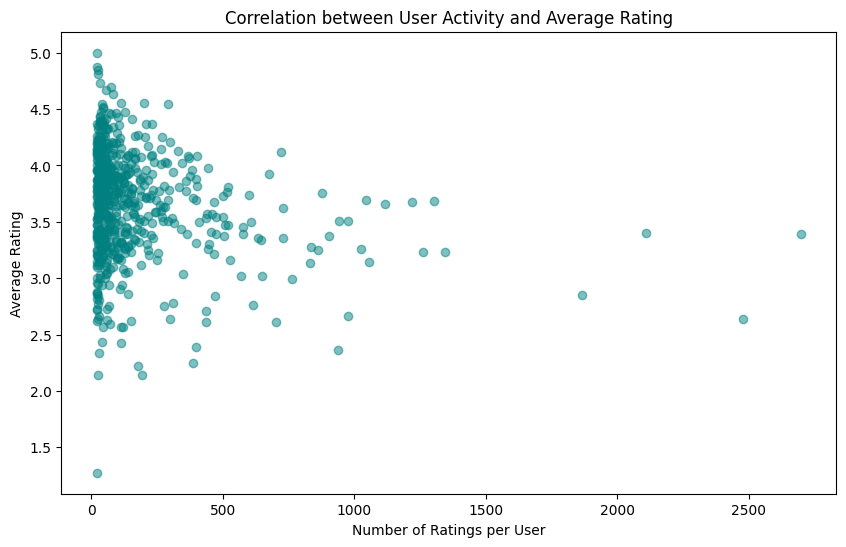

In [26]:
# Calculate average rating per user
user_avg_rating = ratings.groupby('UserID')['Rating'].mean().reset_index()
user_avg_rating.rename(columns={'Rating': 'AvgRating'}, inplace=True)

# Merge with user ratings count
user_activity = pd.merge(user_ratings_count, user_avg_rating, on='UserID')

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(user_activity['RatingsCount'], user_activity['AvgRating'], alpha=0.5, color='teal')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Average Rating')
plt.title('Correlation between User Activity and Average Rating')
plt.show()


## 13. Top 10 Movies by Average Rating


13.1. Movies with Highest Average Ratings

In [27]:
# Calculate average rating per movie
movie_avg_rating = ratings.groupby('MovieID')['Rating'].mean().reset_index()
movie_avg_rating.rename(columns={'Rating': 'AvgRating'}, inplace=True)

# Merge with movies DataFrame
movie_avg_rating = pd.merge(movie_avg_rating, movies[['MovieID', 'Title']], on='MovieID')

# Filter movies with at least N ratings
min_ratings = 50
movie_ratings_count = ratings.groupby('MovieID')['Rating'].count().reset_index()
movie_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

movie_avg_rating = pd.merge(movie_avg_rating, movie_ratings_count, on='MovieID')
popular_movies = movie_avg_rating[movie_avg_rating['RatingsCount'] >= min_ratings]

# Top 10 movies
top_10_movies = popular_movies.sort_values('AvgRating', ascending=False).head(10)
print("Top 10 Movies by Average Rating:")
print(top_10_movies[['Title', 'AvgRating', 'RatingsCount']])


Top 10 Movies by Average Rating:
                                                  Title  AvgRating  \
277                    Shawshank Redemption, The (1994)   4.429022   
659                               Godfather, The (1972)   4.289062   
2224                                  Fight Club (1999)   4.272936   
974                               Cool Hand Luke (1967)   4.271930   
602   Dr. Strangelove or: How I Learned to Stop Worr...   4.268041   
686                                  Rear Window (1954)   4.261905   
921                      Godfather: Part II, The (1974)   4.259690   
6298                               Departed, The (2006)   4.252336   
913                                   Goodfellas (1990)   4.250000   
694                                   Casablanca (1942)   4.240000   

      RatingsCount  
277            317  
659            192  
2224           218  
974             57  
602             97  
686             84  
921            129  
6298           107  
913    

## 14. Distribution of Ratings per Genre

14.1. Boxplot of Ratings by Genre

C:\Users\anujp\AppData\Local\Temp\ipykernel_24996\1926114510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenreList', y='Rating', data=ratings_movies[ratings_movies['GenreList'].isin(genres_to_plot)], palette='Set3')


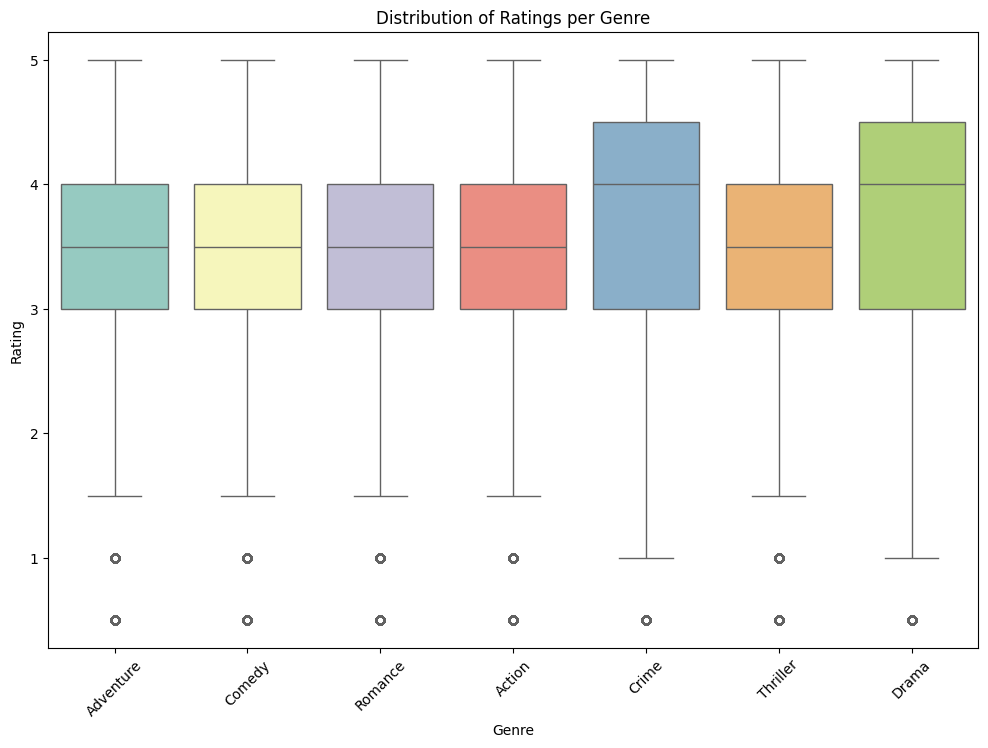

In [28]:
# Using the ratings_movies DataFrame from previous steps

# For genres with sufficient data
genres_to_plot = genre_counts[genre_counts > 1000].index.tolist()

plt.figure(figsize=(12,8))
sns.boxplot(x='GenreList', y='Rating', data=ratings_movies[ratings_movies['GenreList'].isin(genres_to_plot)], palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Distribution of Ratings per Genre')
plt.xticks(rotation=45)
plt.show()


## 15. Heatmap of User-Item Interactions


15.1. Visualize a Subset

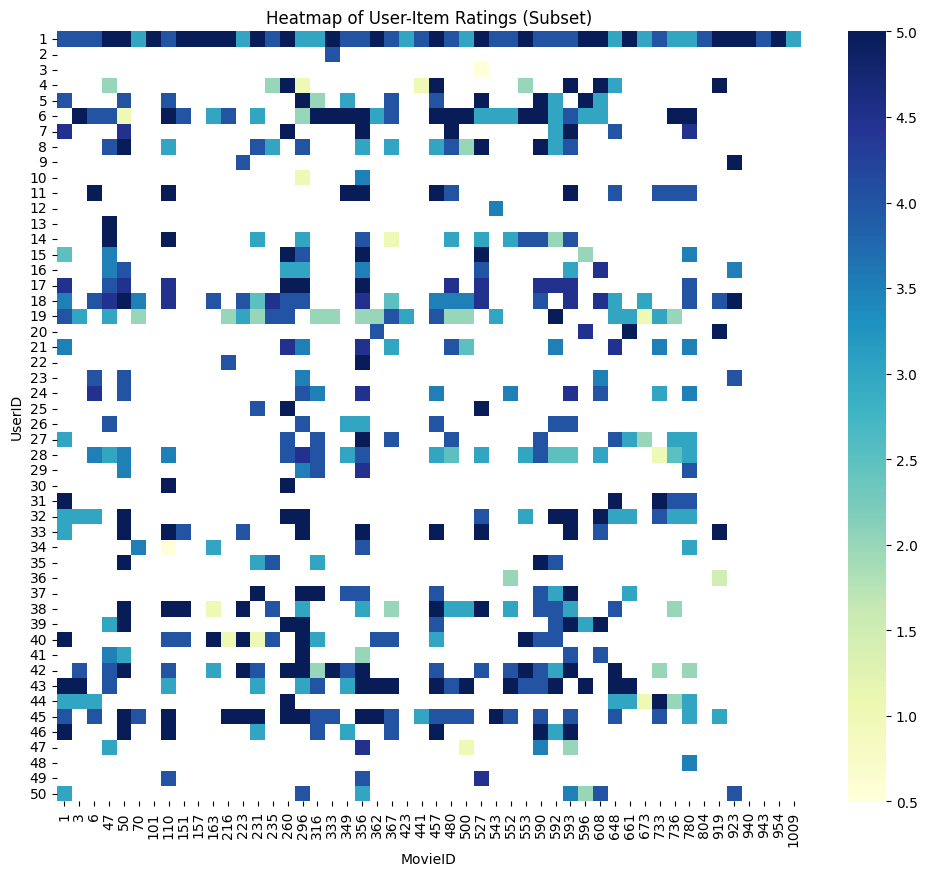

In [29]:
# Create a pivot table for a subset of users and movies
subset_users = ratings['UserID'].unique()[:50]
subset_movies = ratings['MovieID'].unique()[:50]
subset_ratings = ratings[ratings['UserID'].isin(subset_users) & ratings['MovieID'].isin(subset_movies)]
user_item_matrix = subset_ratings.pivot_table(index='UserID', columns='MovieID', values='Rating')

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(user_item_matrix, cmap='YlGnBu')
plt.xlabel('MovieID')
plt.ylabel('UserID')
plt.title('Heatmap of User-Item Ratings (Subset)')
plt.show()


## 16. Year of Movie Release Analysis


16.1. Extract Year from Title

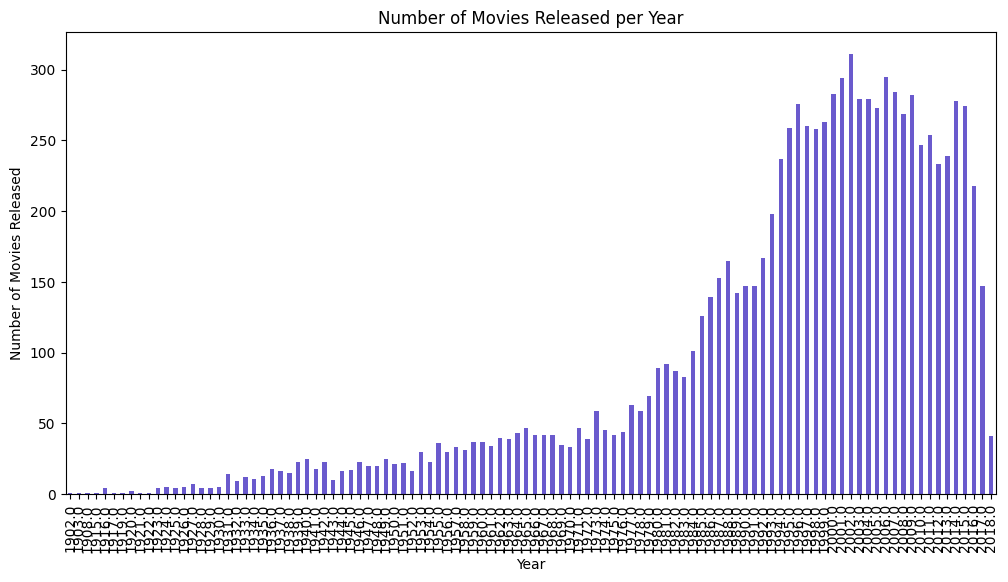

In [30]:
# Extract year from title
movies['Year'] = movies['Title'].str.extract('.*\((\d{4})\).*', expand=False)
movies['Year'] = pd.to_numeric(movies['Year'], errors='coerce')

# Plot number of movies released per year
movies_per_year = movies['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
movies_per_year.plot(kind='bar', color='slateblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.show()


## 17. Most Active Users

17.1. Top Users by Number of Ratings

In [31]:
# Top 10 users by number of ratings
top_users = user_ratings_count.sort_values('RatingsCount', ascending=False).head(10)
print("Top 10 Users by Number of Ratings:")
print(top_users)


Top 10 Users by Number of Ratings:
     UserID  RatingsCount
413     414          2698
598     599          2478
473     474          2108
447     448          1864
273     274          1346
609     610          1302
67       68          1260
379     380          1218
605     606          1115
287     288          1055


## 18. Most Rated Movies

18.1. Top Movies by Number of Ratings

In [32]:
# Top 10 movies by number of ratings
top_movies = movie_ratings_count.sort_values('RatingsCount', ascending=False).head(10)
top_movies = pd.merge(top_movies, movies[['MovieID', 'Title']], on='MovieID')
print("Top 10 Movies by Number of Ratings:")
print(top_movies[['Title', 'RatingsCount']])


Top 10 Movies by Number of Ratings:
                                       Title  RatingsCount
0                        Forrest Gump (1994)           329
1           Shawshank Redemption, The (1994)           317
2                        Pulp Fiction (1994)           307
3           Silence of the Lambs, The (1991)           279
4                         Matrix, The (1999)           278
5  Star Wars: Episode IV - A New Hope (1977)           251
6                       Jurassic Park (1993)           238
7                          Braveheart (1995)           237
8          Terminator 2: Judgment Day (1991)           224
9                    Schindler's List (1993)           220


## 19. Time Between Ratings

19.1. Time Difference Analysis

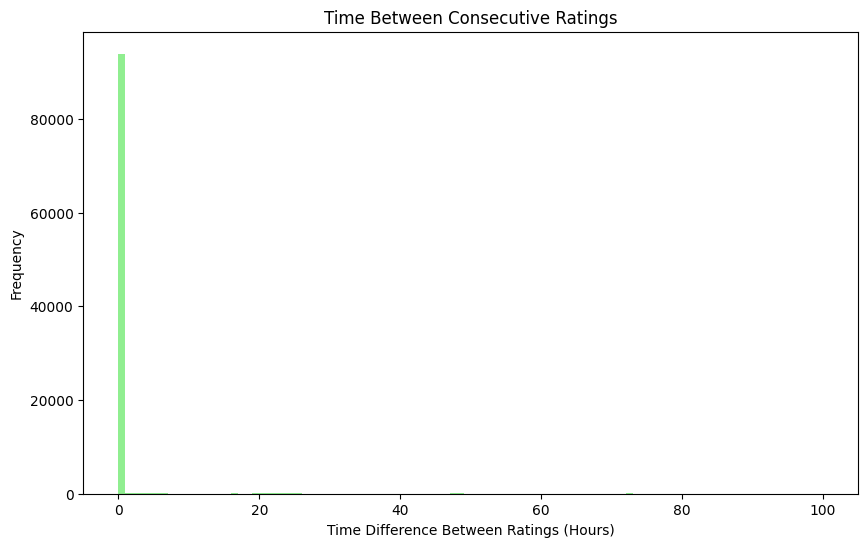

In [33]:
# Calculate time differences between consecutive ratings for users
ratings_sorted = ratings.sort_values(['UserID', 'Timestamp'])
ratings_sorted['TimeDiff'] = ratings_sorted.groupby('UserID')['Timestamp'].diff()

# Plot histogram of time differences (in hours)
time_diffs = ratings_sorted['TimeDiff'].dropna() / 3600  # Convert seconds to hours
plt.figure(figsize=(10,6))
plt.hist(time_diffs, bins=100, range=(0, 100), color='lightgreen')
plt.xlabel('Time Difference Between Ratings (Hours)')
plt.ylabel('Frequency')
plt.title('Time Between Consecutive Ratings')
plt.show()


## 20. User Rating Variability

20.1. Standard Deviation of Ratings per User

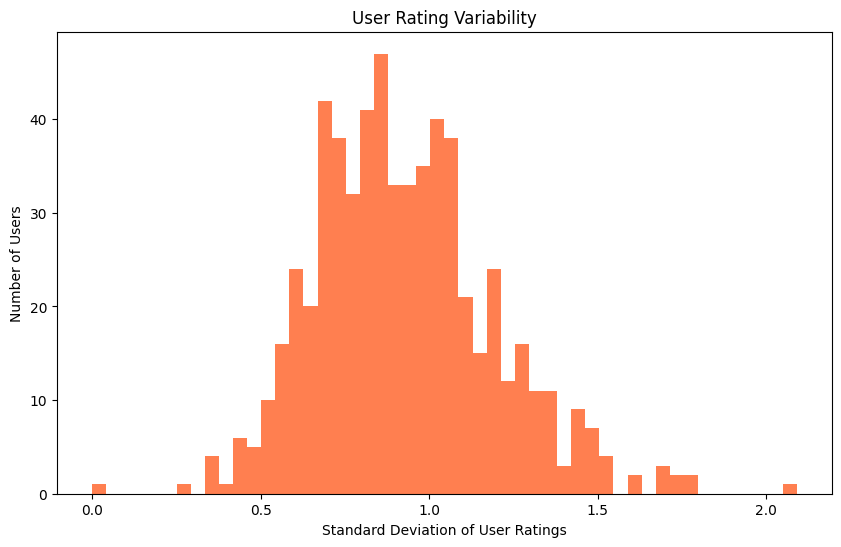

In [34]:
# Calculate standard deviation of ratings per user
user_rating_std = ratings.groupby('UserID')['Rating'].std().reset_index()
user_rating_std.rename(columns={'Rating': 'RatingStd'}, inplace=True)

# Plot distribution
plt.figure(figsize=(10,6))
plt.hist(user_rating_std['RatingStd'].dropna(), bins=50, color='coral')
plt.xlabel('Standard Deviation of User Ratings')
plt.ylabel('Number of Users')
plt.title('User Rating Variability')
plt.show()


## 21. Cross Analysis of Genres and Tags

21.1. Tags per Genre

In [35]:
# Merge tags with movies
tags_movies = pd.merge(tags, movies[['MovieID', 'Genres']], on='MovieID')
tags_movies['GenreList'] = tags_movies['Genres'].str.split('|')
tags_movies = tags_movies.explode('GenreList')

# Most common tags per genre
tags_per_genre = tags_movies.groupby('GenreList')['Tag'].value_counts().groupby(level=0).head(5)

print("Most Common Tags per Genre:")
print(tags_per_genre)


Most Common Tags per Genre:
GenreList           Tag              
(no genres listed)  quirky                1
                    sweet                 1
                    understated           1
Action              superhero            23
                    sci-fi               16
                                         ..
Western             In Netflix queue      3
                    Quentin Tarantino     2
                    Samuel L. Jackson     2
                    Soundtrack            2
                    atmospheric           2
Name: count, Length: 98, dtype: int64


23. Popularity vs. Average Rating

## 22. User-Genre Preferences


22.1. User's Average Rating per Genre



In [36]:
# Create a pivot table
user_genre_rating = ratings_movies.pivot_table(index='UserID', columns='GenreList', values='Rating', aggfunc='mean')

# Display the pivot table for a few users
print("User-Genre Average Ratings:")
print(user_genre_rating.head())


User-Genre Average Ratings:
GenreList  (no genres listed)    Action  Adventure  Animation  Children  \
UserID                                                                    
1                         NaN  4.322222   4.388235   4.689655  4.547619   
2                         NaN  3.954545   4.166667        NaN       NaN   
3                         NaN  3.571429   2.727273   0.500000  0.500000   
4                         NaN  3.320000   3.655172   4.000000  3.800000   
5                         NaN  3.111111   3.250000   4.333333  4.111111   

GenreList    Comedy     Crime  Documentary     Drama   Fantasy  Film-Noir  \
UserID                                                                      
1          4.277108  4.355556          NaN  4.529412  4.297872        5.0   
2          4.000000  3.800000     4.333333  3.882353       NaN        NaN   
3          1.000000  0.500000          NaN  0.750000  3.375000        NaN   
4          3.509615  3.814815     4.000000  3.483333  3.68421

24.1. User's Average Rating per Genre

24.1. User's Average Rating per Genre

In [37]:
# Create a pivot table
user_genre_rating = ratings_movies.pivot_table(index='UserID', columns='GenreList', values='Rating', aggfunc='mean')

# Display the pivot table for a few users
print("User-Genre Average Ratings:")
print(user_genre_rating.head())


User-Genre Average Ratings:
GenreList  (no genres listed)    Action  Adventure  Animation  Children  \
UserID                                                                    
1                         NaN  4.322222   4.388235   4.689655  4.547619   
2                         NaN  3.954545   4.166667        NaN       NaN   
3                         NaN  3.571429   2.727273   0.500000  0.500000   
4                         NaN  3.320000   3.655172   4.000000  3.800000   
5                         NaN  3.111111   3.250000   4.333333  4.111111   

GenreList    Comedy     Crime  Documentary     Drama   Fantasy  Film-Noir  \
UserID                                                                      
1          4.277108  4.355556          NaN  4.529412  4.297872        5.0   
2          4.000000  3.800000     4.333333  3.882353       NaN        NaN   
3          1.000000  0.500000          NaN  0.750000  3.375000        NaN   
4          3.509615  3.814815     4.000000  3.483333  3.68421

# Merge the dataframe while on the MovieID

In [38]:
merged_data = pd.merge(ratings[['UserID', 'MovieID', 'Rating']],
                       movies[['MovieID', 'Title']],
                       on='MovieID',
                       how='left')

# Display the first few rows of the merged DataFrame to verify
print(merged_data.head())

   UserID  MovieID  Rating                        Title
0       1        1     4.0             Toy Story (1995)
1       1        3     4.0      Grumpier Old Men (1995)
2       1        6     4.0                  Heat (1995)
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)
4       1       50     5.0   Usual Suspects, The (1995)


# Save as csv

In [39]:
# Save the merged DataFrame to a CSV file with the correct file extension
merged_data.to_csv("C:\\Users\\anujp\\OneDrive\\Desktop\\MovieRecommendations\\data\\Final_data\\Final_data.csv", index=False)
print("CSV file has been saved successfully.")


CSV file has been saved successfully.


We use this csv to train the model
